In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from copy import deepcopy as dcopy,copy
from skimage.morphology import label
from scipy.ndimage import measurements
import sys
import numba as nb

In [2]:
url='https://www.janestreet.com/puzzles/knight-moves/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print(" ".join(x[7:11]))

A knight was alone on a chessboard.  He started on a square and marked it “1”, then moved to a square and marked it “2”, then moved to a square and marked it “3”, and so on, each time making legal knight’s moves, and never revisiting a square.   Some of the squares he visited are marked on the chessboard presented here. The knight stopped on his 28th square, at which point the 28 visited squares formed a picture with spiral symmetry (90 degree rotational symmetry). The numbers along the sides of the 8 rows and 8 columns are the sums of the numbers of the squares visited by the knight in that row/column. The answer to this month’s puzzle is the largest product of the numbers in any one row or column.


### Puzzle details
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2016/03/Mar16_puzzle.png" width="250">

In [3]:
#Setup the constraints
# 28 filled cells so 7 in each quarter

bot_labels  = [7,14,72,66,102,90,42,13]
right_labels =[10,34,108,67,63,84,24,16]



#########################
# Code to print in a "nice" format
                            
def sol_print(solved):
    fig,ax = plt.subplots(1,1,figsize=(3.5,3.5))
    x = np.array((solved).astype('int').astype('str'))
    x[x=="0"] ="-"
    y = solved != 0
    ax = sns.heatmap(y,annot=x,cbar=False,cmap="Reds",fmt="",linewidths=1,center=4,linecolor="grey",xticklabels=bot_labels, yticklabels=right_labels)
    ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
    plt.xticks(rotation=0,fontweight ='demi')
    plt.yticks(rotation=0,fontweight ='demi')
    plt.tight_layout()



In [4]:
class Matrix():
    def __init__(self,bot_labels,right_labels):
        self.bot_labels = bot_labels
        self.right_labels = right_labels
        # knight moves
        self.x = [2, 1, -1, -2, -2, -1, 1, 2]
        self.y = [1, 2, 2, 1, -1, -2, -2, -1]
        self.solution = []
        self.end_flag =0
        
    #############################################    
    # Backtracking solver    
    def fill(self,row,col,grid,count):
        if self.end_flag ==0:
            if count == 29:
                self.end_flag =1
                sol_print(grid)
                self.solution =dcopy(grid)
                print("******Max Product = {:,.0f}******".format(test.product(grid)))

            for move in range(8):
                if self.possible(move,row,col,grid,count,self.x,self.y,self.right_labels,self.bot_labels):
                    grid[row,col] = count
                    count += 1
                    row += self.x[move]
                    col += self.y[move]                    
                    self.fill(row,col,grid,count)
                    row -= self.x[move]
                    col -= self.y[move]
                    grid[row,col] = 0
                    count -= 1
        return        
               
        

    def possible(self,move,row,col,grid,count,x,y,right_labels,bot_labels):
        if count == 28:
            return True
        
        new_row = row + x[move]
        new_col = col + y[move]
        # check if outside board
        if (new_row > 7) or (new_row < 0):
            return False
        if (new_col > 7) or (new_col < 0):
            return False  
        
        #check if position is filled
        if grid[new_row,new_col] != 0:
            return False
        
        #check filled cells
        if count == 7:
            if (new_row !=4) or (new_col !=2):
                return False            
        if count == 10:
            if (new_row !=2) or (new_col !=3):
                return False            
        if count == 13:
            if (new_row !=3) or (new_col !=5):
                return False        
        if count == 14:
            if (new_row !=5) or (new_col !=4):
                return False
        
        #check row totals
        row_tot = np.sum(grid[new_row,:])+count 
        col_tot = np.sum(grid[:,new_col])+count 
        
        if row_tot >= right_labels[new_row]:
            return False
        
        if col_tot >= bot_labels[new_col]:
            return False
        
        #check if the new row is too low 
        #if row_tot != right_labels[new_row]:
        #    if row_tot + count > right_labels[new_row]:
        #        return False
        
        #if col_tot != bot_labels[new_col]:
        #    if col_tot + count > bot_labels[new_col]:
        #        return False
        
        return True
    
    ##############################################
    # Get the products of the areas of the connected cells
    
    def product(self,grid):
        prods =[]
        for i in range(8):
            row = grid[i,:]
            col = grid[:,i]
            row = row[row != 0]
            col = col[col != 0]
            prods.append(np.product(row))
            prods.append(np.product(col))
        return np.max(prods)
                         
    ###############################################
    # Main solver.
    
    def solve(self):
        solution =[]
        print('\nThe problem - Start {}'.format(time.strftime('%X')))
        for col,row in itertools.product(range(8),range(8)):
            grid = np.zeros((8,8))
            start = time.perf_counter()
            if self.end_flag ==0:
                self.fill(row,col,grid,1)
                stop = time.perf_counter()
                print('Solution row {}, col {} took {:0.4f} seconds'.format(row,col,(stop-start)))
                
        print('\nThe problem - end {}'.format(time.strftime('%X')))
        



The problem - Start 16:30:24
Solution row 0, col 0 took 0.1091 seconds
Solution row 1, col 0 took 9.1017 seconds
Solution row 2, col 0 took 0.1872 seconds
Solution row 3, col 0 took 9.5666 seconds
Solution row 4, col 0 took 0.2015 seconds
Solution row 5, col 0 took 9.6001 seconds
Solution row 6, col 0 took 0.1492 seconds
Solution row 7, col 0 took 6.5661 seconds
Solution row 0, col 1 took 5.1331 seconds
Solution row 1, col 1 took 0.2001 seconds
Solution row 2, col 1 took 4.6015 seconds
Solution row 3, col 1 took 0.2694 seconds
Solution row 4, col 1 took 21.1651 seconds
Solution row 5, col 1 took 0.2510 seconds
Solution row 6, col 1 took 11.2945 seconds
Solution row 7, col 1 took 0.1503 seconds
Solution row 0, col 2 took 0.1886 seconds
Solution row 1, col 2 took 16.1378 seconds
Solution row 2, col 2 took 0.3083 seconds
******Max Product = 19,675,656******
Solution row 3, col 2 took 1.8122 seconds

The problem - end 16:32:01


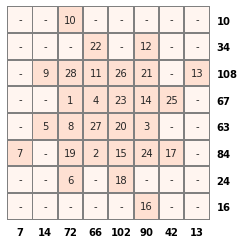

In [5]:
start = time.perf_counter()
test = Matrix(bot_labels,right_labels)
test.solve()
stop =  time.perf_counter()

In [6]:
url='https://www.janestreet.com/puzzles/solutions/march-2016-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print(" ".join(x[7:10]))

The knight’s path is presented here, and the maximum product of the numbers in any row or column is 19,675,656 .


<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2016/04/mar16_solution.png" width="350" >

In [7]:
solution = np.array([[0 ,0 ,10,0 ,0 ,0 ,0 ,0 ],
                     [0 ,0 ,0 ,22,0 ,12,0 ,0 ],
                     [0 ,9 ,28,11,26,21,0 ,13],
                     [0 ,0 ,1 ,4 ,23,14,25,0 ],
                     [0 ,5 ,8 ,27,20,3 ,0 ,0 ],
                     [7 ,0 ,19,2 ,15,24,17,0 ],
                     [0 ,0 ,6 ,0 ,18,0 ,0 ,0 ],
                     [0 ,0 ,0 ,0 ,0 ,16,0 ,0 ]
                    ])
